Change directory
--> Folder will have a file containing PL data from each of 18 seasons, 2003-2021

In [19]:
#cd /Users/charliekanter/Documents/Soccer_Data/

# Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import datetime
from matplotlib.pyplot import figure

##### Seasons start in 3 (2003) and end in 21 (2021)

In [4]:
def open_df(start_year,end_year):
    year=np.arange(start_year,end_year+1)
    years=[str(0)+str(i) if i<10 else str(i) for i in year]
    list_df=[]
    for i in range(len(years)-1):
    
        delimiter=';' if (years[i]=='03' or years[i]=='04' or years[i]=='14') else ',' 
        file = 'pl' + years[i] + '_' + years[i+1] + '.csv' 
        df = pd.read_csv(file, sep=delimiter) # read file file
        list_df.append(df)
    return list_df

In [5]:
def leaderboard(start_year,end_year,graph='yes'):
        
    list_df=open_df(start_year,end_year)
    
    df=pd.DataFrame()
    for data in list_df:
        df=df.append(data).reset_index(drop=True)
    
    teams=df['HomeTeam'].unique()
    leaderboard={team:0 for team in teams } 
    for i in range(len(df)):
        if df['FTR'][i]=='A':
            leaderboard[df['AwayTeam'][i]]+=3
        elif df['FTR'][i]=='H':
            leaderboard[df['HomeTeam'][i]]+=3
        else:
            leaderboard[df['HomeTeam'][i]]+=1
            leaderboard[df['AwayTeam'][i]]+=1
    
    res=sorted(leaderboard.items(), key=lambda x: x[1], reverse=True)
    
    teams=[i[0] for i in res]
    points=[i[1] for i in res]
    if graph=='yes':
        figure(figsize=(8, 6), dpi=80)
        plt.bar(teams,points)
        plt.xlabel("Teams")
        plt.ylabel("Points")
        plt.title('Total leaderboard from '+str(2000+start_year)+' to '+str(2000+end_year))
        plt.xticks(rotation=90)
    return #res

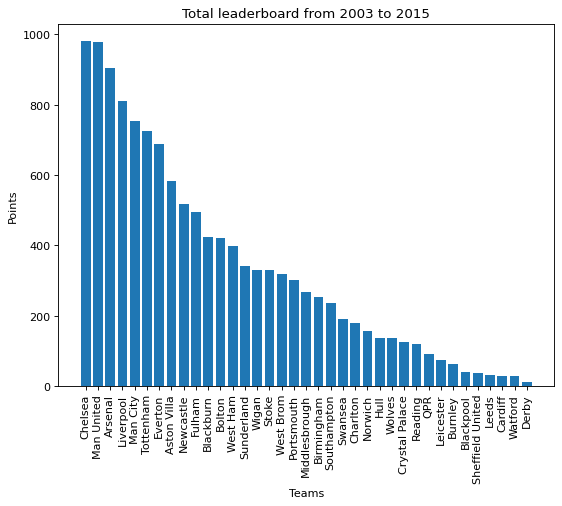

In [6]:
leaderboard(3,15,graph='yes')

In [7]:
def point_per_game(start_year,end_year,graph='yes'):
    
    list_df=open_df(start_year,end_year)
    
    df=pd.DataFrame()
    for data in list_df:
        df=df.append(data).reset_index(drop=True)
    
    teams=df['HomeTeam'].unique()
    ppg={team:0 for team in teams } 
    games={team:0 for team in teams }
    for i in range(len(df)):
        if df['FTR'][i]=='A':
            ppg[df['AwayTeam'][i]]+=3
        elif df['FTR'][i]=='H':
            ppg[df['HomeTeam'][i]]+=3
        else:
            ppg[df['HomeTeam'][i]]+=1
            ppg[df['AwayTeam'][i]]+=1
            
        games[df['HomeTeam'][i]]+=1
        games[df['AwayTeam'][i]]+=1    
        
    for key,value in ppg.items():
        ppg[key]*=1/games[key]
        
    res=sorted(ppg.items(), key=lambda x: x[1], reverse=True)
    
    teams=[i[0] for i in res]
    ratio=[i[1] for i in res]
    if graph=='yes':
        figure(figsize=(8, 6), dpi=80)
        plt.bar(teams,ratio)
        plt.xlabel("Teams")
        plt.ylabel("ratio")
        plt.title('Point per game per team from '+str(2000+start_year)+' to '+str(2000+end_year))
        plt.xticks(rotation=90)
    return res

[('Man City', 2.263157894736842),
 ('Man United', 1.9473684210526314),
 ('Liverpool', 1.8157894736842104),
 ('Chelsea', 1.763157894736842),
 ('Leicester', 1.7368421052631577),
 ('West Ham', 1.7105263157894737),
 ('Tottenham', 1.631578947368421),
 ('Arsenal', 1.6052631578947367),
 ('Everton', 1.5526315789473684),
 ('Leeds', 1.5526315789473684),
 ('Aston Villa', 1.4473684210526314),
 ('Newcastle', 1.1842105263157894),
 ('Wolves', 1.1842105263157894),
 ('Crystal Palace', 1.1578947368421053),
 ('Southampton', 1.131578947368421),
 ('Brighton', 1.0789473684210527),
 ('Burnley', 1.026315789473684),
 ('Fulham', 0.7368421052631579),
 ('West Brom', 0.6842105263157894),
 ('Sheffield United', 0.6052631578947368)]

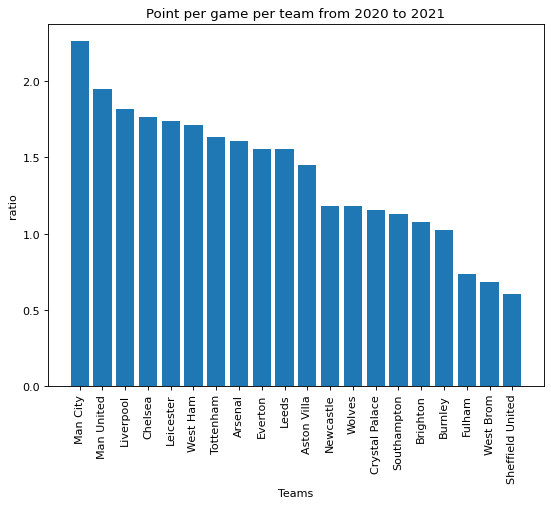

In [8]:
point_per_game(20,21,graph='yes')

In [9]:
# number of wins, loss, draw at home, away or both
def type_results(start_year,end_year,graph='yes'):  
    
    list_df=open_df(start_year,end_year)
    
    df=pd.DataFrame()
    for data in list_df:
        df=df.append(data).reset_index(drop=True)
    
    # of victory,# of draw,# of defeat]
    df['Away']=np.where(df['FTR']=='A',1,0)
    df['Draw']=np.where(df['FTR']=='D',1,0)
    df['Home']=np.where(df['FTR']=='H',1,0)
    
    fig1=df.groupby('HomeTeam').sum()[['Home','Draw','Away']]
    fig1.sort_values(by='Home',axis=0, ascending=False,inplace=True)
    fig2=df.groupby('AwayTeam').sum()[['Home','Draw','Away']]
    fig2.sort_values(by='Away',axis=0, ascending=False,inplace=True)
    
    if graph=='yes':
    #plt.figure(figsize=(10,4))
        fig1.plot(kind='bar')
        fig1
        plt.xlabel("Teams")
        plt.ylabel("Number of results")
        plt.title('Type of result for teams when playing Home (strongest teams at Home) from '+str(2000+start_year)+' to '+str(2000+end_year))
        plt.xticks(rotation=90)
        #print(fig1)
    
        #figure(figsize=(50, 50), dpi=80)
        fig2.plot(kind='bar')
        fig2
        plt.xlabel("Teams")
        plt.ylabel("Number of results")
        plt.title('Type of result for teams when playing Away (strongest teams Away) from '+str(2000+start_year)+' to '+str(2000+end_year))
   
        plt.xticks(rotation=90)
        #print(fig2)
    
    return #fig1,fig2

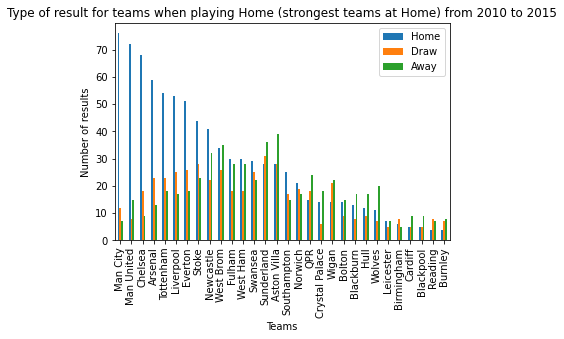

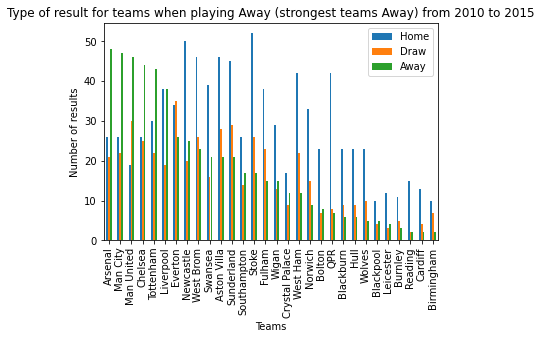

In [10]:
type_results(10,15,graph='yes')

In [11]:
def point_per_game_no_graph(df): ### function used previously were we removed the plotting elements to only use the computed data
    teams=df['HomeTeam'].unique()
    ppg={team:0 for team in teams } 
    games={team:0 for team in teams }
    for i in range(len(df)):
        if df['FTR'][i]=='A':
            ppg[df['AwayTeam'][i]]+=3
        elif df['FTR'][i]=='H':
            ppg[df['HomeTeam'][i]]+=3
        else:
            ppg[df['HomeTeam'][i]]+=1
            ppg[df['AwayTeam'][i]]+=1
            
        games[df['HomeTeam'][i]]+=1
        games[df['AwayTeam'][i]]+=1    
        
    for key,value in ppg.items():
        ppg[key]*=1/games[key]           
    liste=sorted(ppg.values(),reverse=True)
    res=[(find_key(ppg,i),i) for i in liste]
    return res

def find_key(dico,v): 
    for k, val in dico.items(): 
        if v == val: 
            return k 

In [12]:
def average_leaderboard_pos(start_year,end_year,graph='yes'):
    liste=open_df(start_year,end_year)
    res={} #dictionnary of all teams and a list of their successive rankings in seasons 
    for season in liste: #for all season we use a precedent function that establish ranking and store the ranking of the season in a dictionnary
        season_result=point_per_game_no_graph(season)
        rank=1
        for team in season_result:
            if team[0] not in res:
                res[team[0]]=[rank]
            else:
                res[team[0]].append(rank)
            rank+=1
    for team in res: # We compute the mean ranking for each team and sort them based on that.
        res[team]=np.mean(res[team])
    res_sorted=dict(sorted(res.items(), key=lambda item: item[1]))
    team=[]
    avg_rank=[]
    for key in res_sorted: # We plot the scatter plot
        team.append(key)
        avg_rank.append(res_sorted[key])
    res={team[i]:avg_rank[i] for i in range(len(team))}
    if graph=='yes':
        fig, ax = plt.subplots(figsize=(15, 10))
        ax.plot(team, avg_rank)
        plt.title('Average ranking for all teams from '+str(2000+start_year)+' to '+str(2000+end_year))
        ax.set_ylabel('Avg_rank')
        ax.set_xlabel('Teams')
        plt.xticks(rotation=90)
        plt.show()
        
    return res_sorted

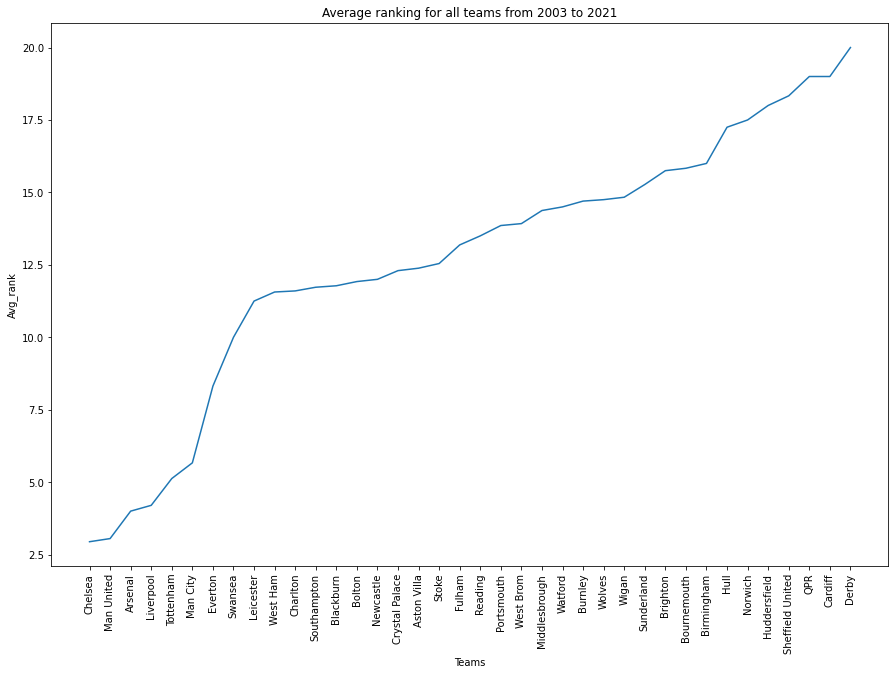

{'Chelsea': 2.9444444444444446,
 'Man United': 3.0526315789473686,
 'Arsenal': 4.0,
 'Liverpool': 4.2,
 'Tottenham': 5.125,
 'Man City': 5.666666666666667,
 'Everton': 8.31578947368421,
 'Swansea': 10.0,
 'Leicester': 11.25,
 'West Ham': 11.5625,
 'Charlton': 11.6,
 'Southampton': 11.727272727272727,
 'Blackburn': 11.777777777777779,
 'Bolton': 11.923076923076923,
 'Newcastle': 12.0,
 'Crystal Palace': 12.3,
 'Aston Villa': 12.384615384615385,
 'Stoke': 12.545454545454545,
 'Fulham': 13.1875,
 'Reading': 13.5,
 'Portsmouth': 13.857142857142858,
 'West Brom': 13.923076923076923,
 'Middlesbrough': 14.375,
 'Watford': 14.5,
 'Burnley': 14.7,
 'Wolves': 14.75,
 'Wigan': 14.833333333333334,
 'Sunderland': 15.272727272727273,
 'Brighton': 15.75,
 'Bournemouth': 15.833333333333334,
 'Birmingham': 16.0,
 'Hull': 17.25,
 'Norwich': 17.5,
 'Huddersfield': 18.0,
 'Sheffield United': 18.333333333333332,
 'QPR': 19.0,
 'Cardiff': 19.0,
 'Derby': 20.0}

In [13]:
average_leaderboard_pos(3,21,graph='yes')

In [14]:
def PL_participation(start_year,end_year,graph='yes'):  
    
    list_df=open_df(start_year,end_year)
    teams_dict={}
    for seasons in list_df:
        teams=seasons['HomeTeam'].unique()
        for team in teams:
            if team in teams_dict:
                teams_dict[team]+=1
            else:
                teams_dict[team]=1
      
    res=sorted(teams_dict.items(), key=lambda x: x[1], reverse=True)
    
    teams=[i[0] for i in res]
    participation=[i[1] for i in res]
    if graph=='yes':
        figure(figsize=(8, 6), dpi=80)
        plt.bar(teams,participation)
        plt.xlabel("Teams")
        plt.ylabel("participation")
        plt.title('Participation of teams in Premier League seasons from '+str(2000+start_year)+' to '+str(2000+end_year))
        plt.xticks(rotation=90)
    return #res

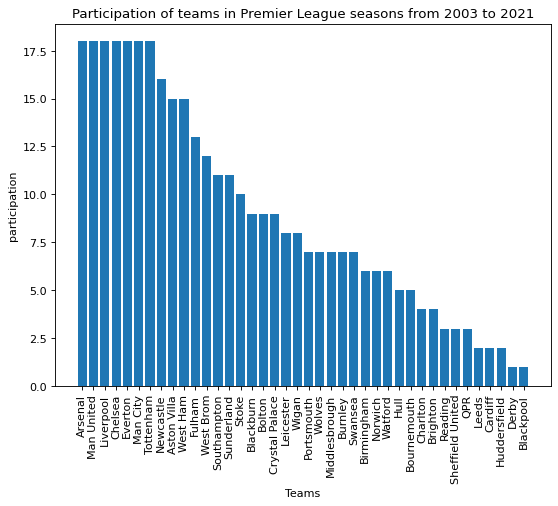

In [15]:
PL_participation(3,21,graph='yes')

In [16]:
def average_odds(start_year,end_year):
    list_df=open_df(start_year,end_year)
    df=pd.DataFrame()
    
    for data in list_df:
        if 'AvgH' in data.columns:
            data['Home_Odd']=data['AvgH']
            data['Draw_Odd']=data['AvgD']
            data['Away_Odd']=data['AvgA']
        elif 'BbAvA' in data.columns:
            data['Home_Odd']=data['BbAvH']
            data['Draw_Odd']=data['BbAvD']
            data['Away_Odd']=data['BbAvA']
        else:
            data['Home_Odd']=pd.Series()
            data['Away_Odd']=pd.Series()
            data['Draw_Odd']=pd.Series()
            for i in range(len(data)): 
                data['Home_Odd'][i]=np.nanmean([data['B365H'][i],data['BWH'][i],data['IWH'][i]])
                data['Draw_Odd'][i]=np.nanmean([data['B365D'][i],data['BWD'][i],data['IWD'][i]])
                data['Away_Odd'][i]=np.nanmean([data['B365A'][i],data['BWA'][i],data['IWA'][i]])
                    
        df=df.append(data).reset_index(drop=True)          
    return df

In [17]:
def average_odd_over_time(start_year,end_year,graph='yes'):
    df=average_odds(start_year,end_year)
    
    fig1=df.groupby('HomeTeam').mean()[['Home_Odd','Draw_Odd','Away_Odd']]
    fig1.sort_values(by='Home_Odd',axis=0,inplace=True)
    fig2=df.groupby('AwayTeam').mean()[['Home_Odd','Draw_Odd','Away_Odd']]
    fig2.sort_values(by='Away_Odd',axis=0,inplace=True)
    
    if graph=='yes':
    #plt.figure(figsize=(10,4))
        fig1.plot(kind='bar')
        fig1
        plt.xlabel("Teams")
        plt.ylabel("Odds")
        plt.title('Mean odds for teams when playing Home (favorite teams at Home) from '+str(2000+start_year)+' to '+str(2000+end_year))
        plt.xticks(rotation=90)
        #print(fig1)
    
        #figure(figsize=(50, 50), dpi=80)
        fig2.plot(kind='bar')
        fig2
        plt.xlabel("Teams")
        plt.ylabel("Odds")
        plt.title('Mean odds for teams when playing Away (favorite teams Away) from '+str(2000+start_year)+' to '+str(2000+end_year))
   
        plt.xticks(rotation=90)
    return #fig1,fig2

C:\Users\arnau\AppData\Local\Temp\ipykernel_15752\1032548101.py:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data['Home_Odd']=pd.Series()
C:\Users\arnau\AppData\Local\Temp\ipykernel_15752\1032548101.py:16: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data['Away_Odd']=pd.Series()
C:\Users\arnau\AppData\Local\Temp\ipykernel_15752\1032548101.py:17: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data['Draw_Odd']=pd.Series()
C:\Users\arnau\AppData\Local\Temp\ipykernel_15752\1032548101.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:/

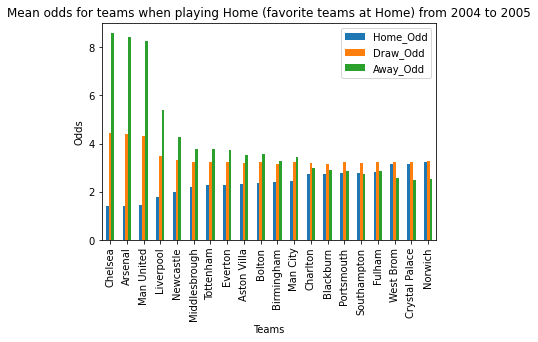

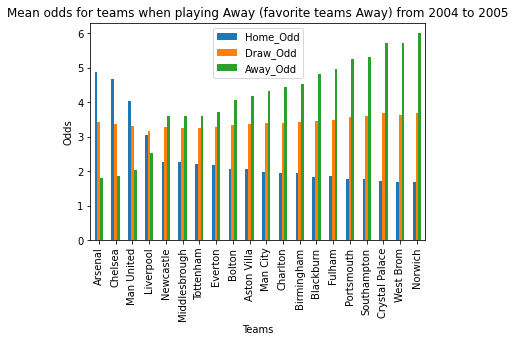

In [18]:
average_odd_over_time(4,5,graph='yes')

In [19]:
def average_goal_scored(start_year,end_year,graph='yes'):
    list_df=open_df(start_year,end_year)
    df=pd.DataFrame()
    for data in list_df:
        df=df.append(data).reset_index(drop=True)
        
        
    fig1=df.groupby('HomeTeam').mean()[['FTHG']]#.reset_index()
    fig1.sort_values(by='FTHG',axis=0, ascending=False,inplace=True)
    fig2=df.groupby('AwayTeam').mean()[['FTAG']]#.reset_index() 
    fig2.sort_values(by='FTAG',axis=0, ascending=False,inplace=True)
    fig3=pd.DataFrame(index=fig1.index)
    fig3['FTG']=(fig1['FTHG']+fig2['FTAG'])/2
    fig3.sort_values(by='FTG',axis=0, ascending=False,inplace=True)
    
    if graph=='yes':
    #plt.figure(figsize=(10,4))
        fig1.plot(kind='bar')
        plt.xlabel("Teams")
        plt.ylabel("Goals scored")
        plt.title('Mean Goals scored per teams when playing Home (favorite teams at Home) from '+str(2000+start_year)+' to '+str(2000+end_year))
        plt.xticks(rotation=90)
        #print(fig1)
    
        #figure(figsize=(50, 50), dpi=80)
        fig2.plot(kind='bar')
        plt.xlabel("Teams")
        plt.ylabel("Goals scored")
        plt.title('Mean Goals scored per teams when playing Away (favorite teams Away) from '+str(2000+start_year)+' to '+str(2000+end_year))
        plt.xticks(rotation=90)
        
        fig3.plot(kind='bar')
        plt.xlabel("Teams")
        plt.ylabel("Goals scored")
        plt.title('Mean Goals scored per teams (home and away) from '+str(2000+start_year)+' to '+str(2000+end_year))
        plt.xticks(rotation=90)
    return #fig3,fig1,fig2

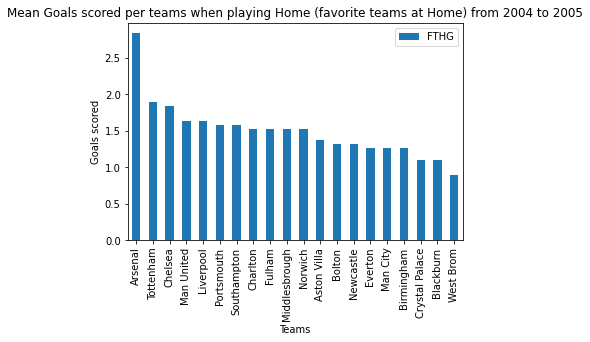

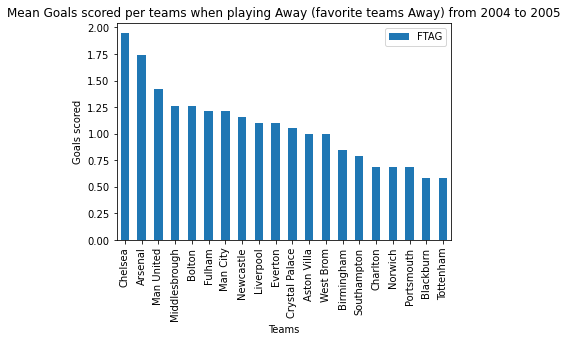

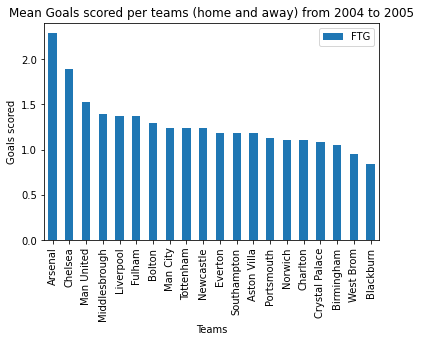

In [20]:
average_goal_scored(4,5,graph='yes')

In [21]:
def average_goal_conceded(start_year,end_year,graph='yes'):
    list_df=open_df(start_year,end_year)
    df=pd.DataFrame()
    for data in list_df:
        df=df.append(data).reset_index(drop=True)
        
    fig1=df.groupby('HomeTeam').mean()[['FTAG']]#.reset_index()
    fig1.sort_values(by='FTAG',axis=0, ascending=False,inplace=True)
    fig2=df.groupby('AwayTeam').mean()[['FTHG']]#.reset_index() 
    fig2.sort_values(by='FTHG',axis=0, ascending=False,inplace=True)
    fig3=pd.DataFrame(index=fig1.index)
    fig3['FTG']=(fig1['FTAG']+fig2['FTHG'])/2
    fig3.sort_values(by='FTG',axis=0, ascending=False,inplace=True)
    
    if graph=='yes':
    #plt.figure(figsize=(10,4))
        fig1.plot(kind='bar')
        plt.xlabel("Teams")
        plt.ylabel("Goals scored")
        plt.title('Mean Goals conceded per teams when playing Home (favorite teams at Home) from '+str(2000+start_year)+' to '+str(2000+end_year))
        plt.xticks(rotation=90)
        #print(fig1)
    
        #figure(figsize=(50, 50), dpi=80)
        fig2.plot(kind='bar')
        plt.xlabel("Teams")
        plt.ylabel("Goals scored")
        plt.title('Mean Goals conceded per teams when playing Away (favorite teams Away) from '+str(2000+start_year)+' to '+str(2000+end_year))
        plt.xticks(rotation=90)
        
        fig3.plot(kind='bar')
        plt.xlabel("Teams")
        plt.ylabel("Goals scored")
        plt.title('Mean Goals conceded per teams (home and away) from '+str(2000+start_year)+' to '+str(2000+end_year))
        plt.xticks(rotation=90)
    return #fig3,fig1,fig2

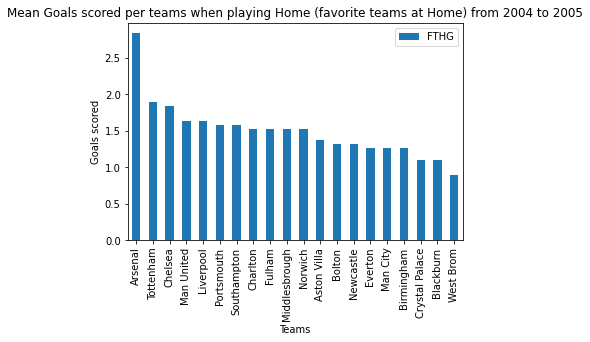

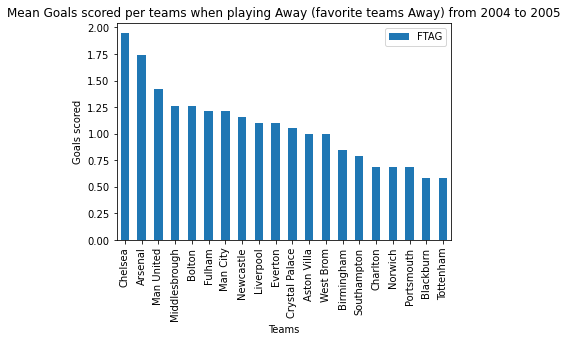

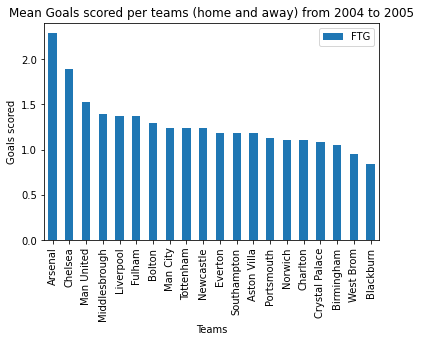

In [22]:
average_goal_scored(4,5,graph='yes')

In [23]:
def bookmaker_performance(start_year,end_year,rounding,min_samplesize,bookmaker):
    #this function only works for home victories
    #rounding determines how you want to round your probabilities
    #samplesize correspond to the minimum number of matches with given probabilities you want to introduce the sample into the study
    #bookmaker is the column name corresponding to the bookmaker you want to study
    list_df=open_df(start_year,end_year)
    df=pd.DataFrame()
    for data in list_df:
        df=df.append(data).reset_index(drop=True)
    df2=df[df[bookmaker].notna()] #We remove all matches for which we don't have information on the bookmaker corresponding odd
    
    df2["H_win_prob"]=round(1/df2[bookmaker],rounding) #Probability of home victory for each match rounded
    Probas=df2['H_win_prob'].unique()
    History={prob:[0,0] for prob in Probas} 
    for i in range(len(df2)): #For all probabilities count the number of matches, and the number of time Home victory happened
        History[df2["H_win_prob"][i]][0]+=1
        if df2["FTR"][i]=="H":
            History[df2["H_win_prob"][i]][1]+=1
    Outcomes=[]
    final_probas=[]
    for proba in Probas:
        if History[proba][0]>min_samplesize: ### we only take probabilities for which we have a large enough sample size
            Outcomes.append(History[proba][1]/History[proba][0])
            final_probas.append(proba)
    ### Plotting and linear regression ###
    a,b=np.polyfit(final_probas, Outcomes, 1)
    tendance=[a*x+b for x in final_probas]
    fig, ax = plt.subplots(figsize=(11, 6))
    ax.scatter(final_probas,Outcomes,label="bookmaker performance")
    ax.plot(final_probas,final_probas,color="r",label="1 correlation (x=y)")
    ax.plot(final_probas,tendance,color="b",label="bookmaker")
    ax.legend()
    ax.set_ylabel('Probability of home victory occuring')
    ax.set_xlabel('Estimated probability by bookmaker (1/odds)')
    
    plt.title('Probability of event vs bookmakers ('+str(bookmaker)+') "probability" from '+str(2000+start_year)+' to '
              +str(2000+end_year)+' with minimum sample size ='+str(min_samplesize))
    plt.show()
    return

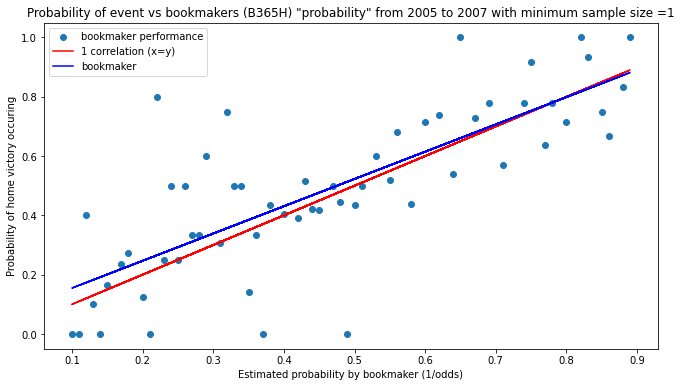

In [24]:
bookmaker_performance(5,7,2,1,"B365H")

In [25]:
def betting_strategy(start_date,end_date,treshold,amount):
    #amount: fixed amount places on each bet
    #treshold: how much the max odd must be superior to the avg odd for you to place a bet
    Balance=[0]
    df=average_odds(start_date,end_date)
    
    for i in range(len(df)): #For each match look for an opportunity by comparing possible max odds with avg oods
        max_odds_H=max(df["B365H"][i],df["BWH"][i],df["IWH"][i])
        max_odds_D=max(df["B365D"][i],df["BWD"][i],df["IWD"][i])
        max_odds_A=max(df["B365A"][i],df["BWA"][i],df["IWA"][i])
        if max_odds_H>=df["Home_Odd"][i]+treshold: 
            if df['FTR'][i]=="H":
                Balance.append(Balance[-1]+amount*(max_odds_H-1)) #adjust balance depending on bet outcome
            else:
                Balance.append(Balance[-1]-amount)
        elif max_odds_D>=df["Draw_Odd"][i]+treshold:
            if df['FTR'][i]=="D":
                Balance.append(Balance[-1]+amount*(max_odds_D-1))
            else:
                Balance.append(Balance[-1]-amount)
        elif max_odds_A>=df["Away_Odd"][i]+treshold:
            if df['FTR'][i]=="A":
                Balance.append(Balance[-1]+amount*(max_odds_A-1))
            else:
                Balance.append(Balance[-1]-amount)
    return Balance,len(df)    

In [26]:
treshholds=np.linspace(-10,10,100)
Balances=[]
for t in treshholds:
    Balances.append(betting_strategy(4,21,t,50)[0][-1])
opt_tresh=treshholds[np.argmax(Balances)]
results=betting_strategy(4,21,opt_tresh,50)
Balance_evolution,total_bets=results[0],results[1]


C:\Users\arnau\AppData\Local\Temp\ipykernel_15752\1032548101.py:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data['Home_Odd']=pd.Series()
C:\Users\arnau\AppData\Local\Temp\ipykernel_15752\1032548101.py:16: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data['Away_Odd']=pd.Series()
C:\Users\arnau\AppData\Local\Temp\ipykernel_15752\1032548101.py:17: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data['Draw_Odd']=pd.Series()
C:\Users\arnau\AppData\Local\Temp\ipykernel_15752\1032548101.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:/

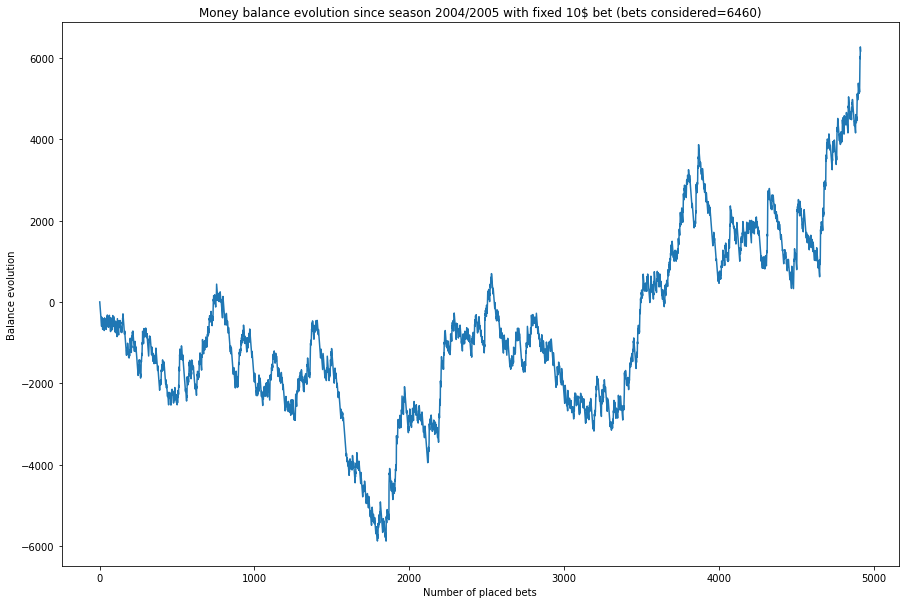

In [27]:
fig, ax = plt.subplots(figsize=(15, 10))
bets=np.arange(1,len(Balance_evolution)+1)
ax.plot(bets,Balance_evolution)
plt.title('Money balance evolution since season 2004/2005 with fixed 10$ bet (bets considered=' + str(total_bets) +')')
ax.set_ylabel('Balance evolution')
ax.set_xlabel('Number of placed bets')
plt.show()

In [28]:
def betting_strategy_prob(start_date,end_date,treshold,amount):
    #amount: fixed amount places on each bet
    #treshold: how much the max odd must be superior to the avg odd for you to place a bet
    Balance=[0]
    df=average_odds(start_date,end_date)
    
    for i in range(len(df)): #For each match look for an opportunity by comparing possible max odds with avg oods
        min_prob_H=1/(max(df["B365H"][i],df["BWH"][i],df["IWH"][i]))
        min_prob_D=1/(max(df["B365D"][i],df["BWD"][i],df["IWD"][i]))
        min_prob_A=1/(max(df["B365A"][i],df["BWA"][i],df["IWA"][i]))
        bet_types=["H","D","A"]
        Gaps=[min_prob_H-1/df["Home_Odd"][i],min_prob_D-1/df["Draw_Odd"][i],min_prob_A-1/df["Away_Odd"][i]]
        min_index = Gaps.index(min(Gaps))
        bet_type=bet_types[min_index]
        if min_prob_H<=(1/df["Home_Odd"][i])-treshold and bet_type=="H": 
            if df['FTR'][i]=="H":
                Balance.append(Balance[-1]+amount*((1/min_prob_H)-1)) #adjust balance depending on bet outcome
            else:
                Balance.append(Balance[-1]-amount)
        if min_prob_D>=(1/df["Draw_Odd"][i])-treshold and bet_type=="D":
            if df['FTR'][i]=="D":
                Balance.append(Balance[-1]+amount*((1/min_prob_D)-1))
            else:
                Balance.append(Balance[-1]-amount)
        if min_prob_A>=(1/df["Away_Odd"][i])-treshold and bet_type=="A":
            if df['FTR'][i]=="A":
                Balance.append(Balance[-1]+amount*((1/min_prob_A)-1))
            else:
                Balance.append(Balance[-1]-amount)
    return Balance,len(df)    

In [29]:
treshholds=np.linspace(0,1,100)
Balances=[]
for t in treshholds:
    Balances.append(betting_strategy_prob(20,21,t,50)[0][-1])
opt_tresh=treshholds[np.argmax(Balances)]
results=betting_strategy_prob(20,21,opt_tresh,50)
Balance_evolution,total_bets=results[0],results[1]

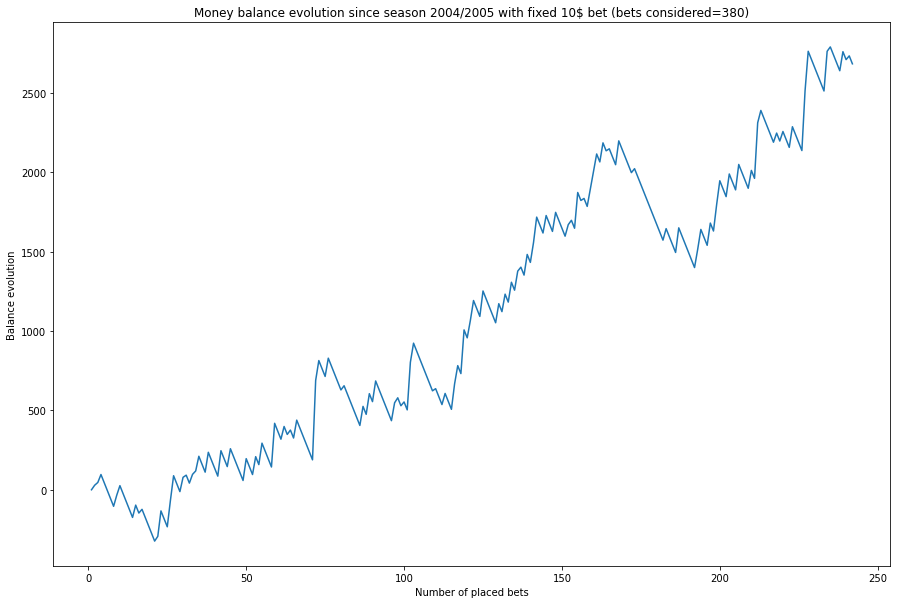

In [30]:
fig, ax = plt.subplots(figsize=(15, 10))
bets=np.arange(1,len(Balance_evolution)+1)
ax.plot(bets,Balance_evolution)
plt.title('Money balance evolution since season 2004/2005 with fixed 10$ bet (bets considered=' + str(total_bets) +')')
ax.set_ylabel('Balance evolution')
ax.set_xlabel('Number of placed bets')
plt.show()

In [31]:
profit=betting_strategy(20,21,opt_tresh,50)
print(' Profit generated with "max strategy" :'+str(profit[-1])+'$ for threshold ='+str(round(opt_tresh,3))) 

 Profit generated with "max strategy" :380$ for threshold =0.01


# Data Approach 1 (Moving Average)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np 
import pylab 
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt

change the directory to where all of the data files are located on your computer

In [4]:
cd /Users/charliekanter/Documents/Soccer_Data/

/Users/charliekanter/Documents/Soccer_Data


### Data Preprocessing

Find all the features that have been in the dataset for the past 19 years.
Only use those columns that are constant through that time

In [5]:
data03 = pd.read_csv('pl03_04.csv', on_bad_lines='skip') # load in the first dataset for reference
cols03 = set(data03.columns)

In [6]:
years = ['03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21']
cols = cols03 # initalize the column set with the first dataset
for i, year in enumerate(years):
  try:
    file1 = 'pl' + years[i] + '_' + years[i+1] + '.csv'                         # first file name
    file2 = 'pl' + years[i+1] + '_' + years[i+2] + '.csv'                       # second file name
    temp1 = pd.read_csv(file1, on_bad_lines='skip', encoding= 'unicode_escape') # read file file
    temp2 = pd.read_csv(file2, on_bad_lines='skip', encoding= 'unicode_escape') # read second file
    current_cols1 = set(temp1.columns)                                          # create a set of the first data columns
    current_cols2 = set(temp2.columns)                                          # create a set of the second data columns
    cols = cols & current_cols1 & current_cols2                                 # the new column set is the file 1 and file 2 and the previous column set
    constant_columns = list(cols & current_cols1 & current_cols2)               # find the common columns between the two sets and create a list of them
  except IndexError:
    break

In [ ]:
years = ['03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21']
data = pd.DataFrame(columns = constant_columns)
for i, year in enumerate(years):
  try:
    file = 'pl' + year + '_' + years[i+1] + '.csv'
    temp = pd.read_csv(file, on_bad_lines='skip', encoding= 'unicode_escape')
    temp_corrrect_cols = temp[constant_columns]

    data = data.append(temp_corrrect_cols)
  except IndexError:
    break

In [ ]:
# convert data to correct datatypes
for col in constant_columns:
  try:
    data[col] = data[col].astype(float)
  except ValueError:
    if col == 'Date':
      data[col] = pd.to_datetime(data[col])
    else:
      data[col] = data[col].astype(str)

In [ ]:
#drop the rows with NaN or NA
data.dropna(inplace=True)

Export to CSV

In [ ]:
data.to_csv('pl_all_seasons.csv')

###### Import Data (If already ran above code)

In [10]:
data = pd.read_csv('pl_all_seasons.csv')
test_data = pd.read_csv('pl21_22.csv')

In [11]:
#list(zip(list(test_data.columns),list(test_data.dtypes)))

### Process Imported Data

Split Data by Home and Away

In [25]:
awayFeatures = ['Date','AwayTeam','Div','FTR','HTR','Referee','WHD','B365D','IWD','AY', 'AS', 'IWA', 'B365A', 'AF', 'AST', 'AR', 'WHA', 'FTAG', 'AC', 'HTAG'] # Draw columns 'WHD','B365D','IWD',
homeFeatures = ['Date','HomeTeam','Div','FTR','HTR','Referee','WHD','B365D','IWD','HY', 'HS', 'IWH', 'B365H', 'HF', 'HST', 'HR', 'WHH', 'FTHG', 'HC', 'HTHG']

# Regression, Ensemble
#training
home_data = data[homeFeatures]
away_data = data[awayFeatures]
#testing
test_home_data = test_data[homeFeatures]
test_away_data = test_data[awayFeatures]

In [ ]:
HomeTeams = home_data.HomeTeam.unique()
NNHomeTeams = nn_home_data.HomeTeam.unique()
HomeNN = home_data.loc[home_data['HomeTeam'].isin(TestHomeTeams)]
HomeNNTeams=HomeNN.HomeTeam.unique()
HomeNN=HomeNN.replace("D","A")
test_home_data=test_home_data.replace("D","A")

Split the data by team and create a rolling moving average

In [26]:
# Regression, Ensemble
#training
AwayTeams = away_data.AwayTeam.unique()
HomeTeams = home_data.HomeTeam.unique()
#testing
test_AwayTeams = test_away_data.AwayTeam.unique()
test_HomeTeams = test_home_data.HomeTeam.unique()

First a Simple Moving Average (SMA)

Training

In [28]:
#Home Calculations
rolling3_home = {team: home_data[home_data['HomeTeam'] == team].rolling(3).mean() for team in HomeTeams} # create a dictionary of dataframes based on team as the key

# Add the Full Time Result Column back
# Also name the dataframe
for team in HomeTeams:
  rolling3_home[team]['FTR'] = home_data[home_data['HomeTeam']==team].FTR
  rolling3_home[team].name = 'rolling3_home'

# Away Calculations
rolling3_away = {team: away_data[away_data['AwayTeam'] == team].rolling(3).mean() for team in AwayTeams} # create a dictionary of dataframes based on team as the key

# Add the Full Time Result Column back
# Also name the dataframe
for team in AwayTeams:
  rolling3_away[team]['FTR'] = away_data[away_data['AwayTeam']==team].FTR
  rolling3_away[team].name = 'rolling3_away'

Testing

In [29]:
#Home Calculations
test_rolling3_home = {team: test_home_data[test_home_data['HomeTeam'] == team].rolling(3).mean() for team in test_HomeTeams} # create a dictionary of dataframes based on team as the key

# Add the Full Time Result Column back
# Also name the dataframe
for team in test_HomeTeams:
  test_rolling3_home[team]['FTR'] = test_home_data[test_home_data['HomeTeam']==team].FTR
  test_rolling3_home[team].name = 'rolling3_home'

# Away Calculations
test_rolling3_away = {team: test_away_data[test_away_data['AwayTeam'] == team].rolling(3).mean() for team in test_AwayTeams} # create a dictionary of dataframes based on team as the key

# Add the Full Time Result Column back
# Also name the dataframe
for team in test_AwayTeams:
  test_rolling3_away[team]['FTR'] = test_away_data[test_away_data['AwayTeam']==team].FTR
  test_rolling3_away[team].name = 'rolling3_away'

Next an Exponential Moving Average (EMA)

Training

In [32]:
# Home calculations
rolling3_ema_home = {team: home_data[home_data['HomeTeam'] == team].ewm(span=5, adjust=False).mean() for team in HomeTeams}

# Add the Full Time Result Column back
# Also name the dataframe
for team in HomeTeams:
  rolling3_ema_home[team]['FTR'] = home_data[home_data['HomeTeam']==team].FTR
  rolling3_ema_home[team].name = 'rolling3_ema_home'

# Away calculations
rolling3_ema_away = {team: away_data[away_data['AwayTeam'] == team].ewm(span=5, adjust=False).mean() for team in AwayTeams}

# Add the Full Time Result Column back
# Also name the dataframe
for team in AwayTeams:
  rolling3_ema_away[team]['FTR'] = away_data[away_data['AwayTeam']==team].FTR
  rolling3_ema_away[team].name = 'rolling3_ema_away'

Testing

In [31]:
# Home calculations
test_rolling3_ema_home = {team: test_home_data[test_home_data['HomeTeam'] == team].ewm(span=5, adjust=False).mean() for team in test_HomeTeams}

# Add the Full Time Result Column back
# Also name the dataframe
for team in test_HomeTeams:
  test_rolling3_ema_home[team]['FTR'] = test_home_data[test_home_data['HomeTeam']==team].FTR
  test_rolling3_ema_home[team].name = 'rolling3_ema_home'

# Away calculations
test_rolling3_ema_away = {team: test_away_data[test_away_data['AwayTeam'] == team].ewm(span=5, adjust=False).mean() for team in test_AwayTeams}

# Add the Full Time Result Column back
# Also name the dataframe
for team in test_AwayTeams:
  test_rolling3_ema_away[team]['FTR'] = test_away_data[test_away_data['AwayTeam']==team].FTR
  test_rolling3_ema_away[team].name = 'rolling3_ema_away'

Do the same for Neural Net:

In [36]:
#Split By Home and Away
awayFeatures = ['Date','AwayTeam','Div','FTR','HTR','Referee','WHD','B365D','IWD','AY', 'AS', 'IWA', 'B365A', 'AF', 'AST', 'AR', 'WHA', 'AC', 'HTAG', 'FTHG'] # Draw columns 'WHD','B365D','IWD',
homeFeatures = ['Date','HomeTeam','Div','FTR','HTR','Referee','WHD','B365D','IWD','HY', 'HS', 'IWH', 'B365H', 'HF', 'HST', 'HR', 'WHH', 'FTHG', 'HC', 'HTHG',]
#Training
nn_home_data = data[homeFeatures]
nn_away_data = data[awayFeatures]
#Testing
data_22 = pd.read_csv('pl21_22.csv')
nn_away_test = data_22[awayFeatures]
nn_home_test = data_22[homeFeatures]

#Track team names in testing
HomeTeamsNN = nn_home_test.HomeTeam.unique()
AwayTeamsNN = nn_away_test.AwayTeam.unique()
#Use data only for those teams
HomeNN = nn_home_data.loc[nn_home_data['HomeTeam'].isin(HomeTeamsNN)]
AwayNN = nn_away_data.loc[nn_away_data['AwayTeam'].isin(AwayTeamsNN)]
#Consider draw as loss
HomeNN = HomeNN.replace("D","A")
AwayNN = AwayNN.replace("D","H")
nn_home_test = nn_home_test.replace("D","A")
nn_away_test = nn_away_test.replace("D","H")
#  -----------------------------------------------------------------------

# Train calculations
rolling5_ema_home_nn_train = {team: HomeNN[HomeNN['HomeTeam'] == team].ewm(span=5, adjust=False).mean() for team in HomeTeamsNN}
rolling5_ema_away_nn_train = {team: AwayNN[AwayNN['AwayTeam'] == team].ewm(span=5, adjust=False).mean() for team in AwayTeamsNN}

# Add the Full Time Result Column back
# Also name the dataframe
for team in HomeTeamsNN:
    rolling5_ema_home_nn_train[team]['FTR'] = HomeNN[HomeNN['HomeTeam']==team].FTR
    rolling5_ema_home_nn_train[team].name = 'rolling5_ema_home_nn_train'
for team in AwayTeamsNN:
    rolling5_ema_away_nn_train[team]['FTR'] = AwayNN[AwayNN['AwayTeam']==team].FTR
    rolling5_ema_away_nn_train[team].name = 'rolling5_ema_away_nn_train'
#  -----------------------------------------------------------------------

# Test calculations
rolling5_ema_home_nn_test = {team: nn_home_test[nn_home_test['HomeTeam'] == team].ewm(span=5, adjust=False).mean() for team in HomeTeamsNN}
rolling5_ema_away_nn_test = {team: nn_away_test[nn_away_test['AwayTeam'] == team].ewm(span=5, adjust=False).mean() for team in AwayTeamsNN}

# Add the Full Time Result Column back
# Also name the dataframe
for team in HomeTeamsNN:
    rolling5_ema_home_nn_test[team]['FTR'] = nn_home_test[nn_home_test['HomeTeam']==team].FTR
    rolling5_ema_home_nn_test[team].name = 'rolling5_ema_home_nn_test'
for team in AwayTeamsNN:
    rolling5_ema_away_nn_test[team]['FTR'] = nn_away_test[nn_away_test['AwayTeam']==team].FTR
    rolling5_ema_away_nn_test[team].name = 'rolling5_ema_away_nn_test'
#  -----------------------------------------------------------------------
#Set names for modeling
roll_home_train = rolling5_ema_home_nn_train
roll_away_train = rolling5_ema_away_nn_train
roll_home_test = rolling5_ema_home_nn_test
roll_away_test = rolling5_ema_away_nn_test

#### Visualize Moving Averages (Example)

Text(0.5, 1.0, 'Arsenal Goals Scored Per Game')

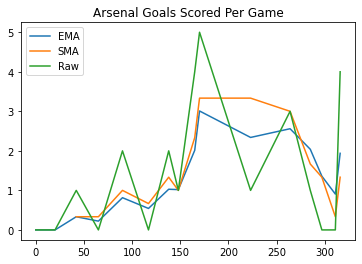

In [23]:
#Visualize Moving Averages (Example)
test_rolling3_ema_away['Arsenal']['FTAG'].plot()
test_rolling3_away['Arsenal']['FTAG'].plot()
test_data[test_data.AwayTeam=="Arsenal"]['FTAG'].plot()
plt.legend(['EMA','SMA','Raw'])
plt.title("Arsenal Goals Scored Per Game")

### Test Models: Betting Strategy

An ensemble model based betting strategy.

In [37]:
# Imports for ensemble models
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

def emseble_wager(dataset, team, test_thresh, bet, test_data=False, test_dataset = None, params=dict(),classifiers=[BaggingClassifier, RandomForestClassifier]):
  '''
  # create a correlation matrix
  corr_matrix = dataset.corr().abs()
  
  # Select upper triangle of correlation matrix
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
  
  # Find features with correlation greater than 0.95
  to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

  # Drop features
  dataset.drop(to_drop, axis=1, inplace=True)
  
  if test_data == True:
    test_corr_matrix = test_dataset.corr().abs()

    test_upper = test_corr_matrix.where(np.triu(np.ones(test_corr_matrix.shape), k=1).astype(np.bool))

    test_to_drop = [column for column in test_upper.columns if any(test_upper[column] > 0.7)]

    test_dataset.drop(test_to_drop, axis=1, inplace=True)
  '''


  model_data = dataset

  # Split data into training and testing sets
  if test_data == False:
    test_size = int(round(len(model_data)*test_thresh,0)) # determine testing and training size since we are using time series data we do not want to randomly split
    x_train = model_data.iloc[:-test_size, ~model_data.columns.isin(['FTR','HomeWin','AwayWin'])]
    y_train = model_data['FTR'][:-test_size]
    x_test = model_data.iloc[-test_size:, ~model_data.columns.isin(['FTR','HomeWin','AwayWin'])]
    y_test = model_data['FTR'][-test_size:]

  else:
    x_train = model_data.iloc[:, ~model_data.columns.isin(['FTR','HomeWin','AwayWin'])]
    y_train = model_data['FTR']
    x_test = test_dataset.iloc[:, ~test_dataset.columns.isin(['FTR','HomeWin','AwayWin'])]
    y_test = test_dataset['FTR']

  # fill those NaN vlaues with 0
  x_train.fillna(0, inplace=True)
  x_test.fillna(0, inplace=True)

  accuracies = []
  profit_loss = []
  i = 0
  # try different ensemble models and append their results to the columns
  # of a dataframe.
  for classifier in classifiers:
    i += 1

    model = GridSearchCV(classifier(),parameters,cv=3)
    inputs = x_train
    outputs = y_train
    model.fit(inputs, np.ravel(outputs))

    model = classifier(max_samples=model.best_params_['max_samples'],n_estimators=model.best_params_['n_estimators'])
    model.fit(x_train,y_train)
    model_acc = model.score(x_test,y_test)
    accuracies.append((classifier, model_acc))
    classify_predictions = np.array(model.predict(x_test))
    real_results = np.array(y_test)
    
    winnings = 0
    for i in range(len(classify_predictions)):
      if classify_predictions[i] == real_results[i]:
        winnings += bet
      else:
        winnings -= bet
    
    profit_loss.append(("model_"+str(i)+"_Profit/Loss",winnings))

  results = pd.DataFrame({accuracies[0][0]:accuracies[0][1],
                          profit_loss[0][0]:profit_loss[0][1],
                            accuracies[1][0]:accuracies[1][1],
                          profit_loss[1][0]:profit_loss[1][1],
                          "Dataset":dataset.name},
                          index = [team])
  return results


Test the model across the home and away datasets and record the results in a dataframe

In [38]:
parameters = {
     'n_estimators':(10,30, 50,100), #the number of trees
     'max_samples':(.30,.40,.50,1.0),
}

classifier_results_df = pd.DataFrame()#columns = [sklearn.ensemble._bagging.BaggingClassifier,sklearn.ensemble._forest.RandomForestClassifier])
datasets = [(rolling3_ema_away, test_rolling3_ema_away), (rolling3_ema_home, test_rolling3_ema_home)]

for dataset in datasets:
  for team in dataset[0]:
    try:
      r = emseble_wager(dataset=dataset[0][team], team=team, test_thresh=.1, bet=10, test_data=True, test_dataset=dataset[1][team], params=parameters)
      classifier_results_df = pd.concat([classifier_results_df,r])
    except ValueError:
      pass
    except KeyError:
      pass

print(classifier_results_df.mean())

<class 'sklearn.ensemble._bagging.BaggingClassifier'>         0.548381
model_15_Profit/Loss                                         21.111111
<class 'sklearn.ensemble._forest.RandomForestClassifier'>     0.548175
model_16_Profit/Loss                                         12.105263
model_14_Profit/Loss                                        -10.000000
dtype: float64


In [39]:
print("Profit on our classifier based betting strategy: $", classifier_results_df.sum())

Profit on our classifier based betting strategy: $ <class 'sklearn.ensemble._bagging.BaggingClassifier'>                                                 20.83848
model_15_Profit/Loss                                                                                     380.0
<class 'sklearn.ensemble._forest.RandomForestClassifier'>                                            20.830637
Dataset                                                      rolling3_ema_awayrolling3_ema_awayrolling3_ema...
model_16_Profit/Loss                                                                                     230.0
model_14_Profit/Loss                                                                                     -10.0
dtype: object


In [40]:
classifier_results_df.iloc[:,0].mean() # Bagging Model

0.5483810629514965

In [41]:
classifier_results_df.iloc[:,2].mean() # Random Forest

0.5481746646026832

Regression model based strategy.

In [42]:
# create a function that can classify the linear regression results
def get_classification(predictions,threshold):
    classes = np.zeros_like(predictions)
    for i in range(len(classes)):
        if predictions[i] > threshold:
            classes[i] = 1
    return classes

In [66]:
def regression_wager(dataset, team, test_thresh, bet, test_data=False, test_dataset=None):
  '''
  # create a correlation matrix
  corr_matrix = dataset.corr().abs()
  
  # Select upper triangle of correlation matrix
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
  
  # Find features with correlation greater than 0.95
  to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

  # Drop features
  dataset.drop(to_drop, axis=1, inplace=True)
  
  if test_data == True:
    test_corr_matrix = test_dataset.corr().abs()

    test_upper = test_corr_matrix.where(np.triu(np.ones(test_corr_matrix.shape), k=1).astype(np.bool))

    test_to_drop = [column for column in test_upper.columns if any(test_upper[column] > 0.7)]

    test_dataset.drop(test_to_drop, axis=1, inplace=True)
  '''

  # Use OneHotEncoding to determine Home or Away win
  ### Train
  dataset['HomeWin'] = np.where(dataset['FTR'] == 'H',1,0)
  dataset['AwayWin'] = np.where(dataset['FTR'] == 'A',1,0)
  ### Test
  test_dataset['HomeWin'] = np.where(test_dataset['FTR'] == 'H',1,0)
  test_dataset['AwayWin'] = np.where(test_dataset['FTR'] == 'A',1,0)

  #remove the Full Time Result and Half Time result columns since we already One-hot encoded those columns
  model_data = dataset.drop(['FTR'],axis=1)
  test_model_data = test_dataset.drop(['FTR'],axis=1)

  # Split data into training and testing sets
  if test_data == False:
    test_size = int(round(len(model_data)*test_thresh,0)) # determine testing and training size since we are using time series data we do not want to randomly split
    x_train = model_data.iloc[:-test_size, ~model_data.columns.isin(['HomeWin', 'AwayWin'])]
    y_train = model_data['HomeWin'][:-test_size]
    x_test = model_data.iloc[-test_size:, ~model_data.columns.isin(['HomeWin', 'AwayWin'])]
    y_test = model_data['HomeWin'][-test_size:]

  else:
    x_train = model_data.iloc[:, ~model_data.columns.isin(['HomeWin','AwayWin'])]
    y_train = model_data['HomeWin']
    x_test = test_model_data.iloc[:, ~test_model_data.columns.isin(['HomeWin','AwayWin'])]
    y_test = test_model_data['HomeWin']

  # fill those NaN vlaues with 0
  x_train.fillna(0, inplace=True)
  x_test.fillna(0, inplace=True)

  # Initialize the model
  model = linear_model.LinearRegression()
  model.fit(x_train,y_train)

  # predict the testing set
  testing_predictions = model.predict(x_test)

  # create a confusion matrix to evaulate the model's performance
  tn, fp, fn, tp = confusion_matrix(y_test,get_classification(testing_predictions,0.5)).ravel()

  # Accuracy
  accuracy = (tp+tn)/(tp+tn+fp+fn)

  classify_predictions = np.array(get_classification(testing_predictions, threshold=test_thresh))
  real_results = np.array(y_test)

  base = bet # reset the bet back to original starting bet
  winnings = 0
  for i in range(len(classify_predictions)):
    if classify_predictions[i] == real_results[i]:
      winnings += base
    else:
      winnings -= base

  base = bet # reset the bet back to original starting bet
  # double the bet every time you lose
  double = 0
  for i in range(len(classify_predictions)):
    if classify_predictions[i] == real_results[i]:
      double += base
    else:
      double -= base
      base = base*2
  
  base = bet # reset the bet back to original starting bet
  # halve the bet every time you lose
  halved = 0
  for i in range(len(classify_predictions)):
    if classify_predictions[i] == real_results[i]:
      halved += base
    else:
      halved -= base
      base = base/2
  
  base = bet # reset the bet back to original starting bet
  # halve the bet every time you lose, double the bet every time you win
  halved_doubled = 0 
  for i in range(len(classify_predictions)):
    if base > 100 or base < 1:
      base = bet
    if classify_predictions[i] == real_results[i]:
      halved_doubled += base
      base = base*2
    else:
      halved_doubled -= base
      base = base/2

  results = pd.DataFrame({"Model_Accuracy":accuracy,
                          "Bet Strategy 1":winnings,
                          "Bet Strategy 2":double,
                          "Bet Strategy 3":halved,
                          "Bet Strategy 4":halved_doubled,
                          "Dataset":dataset.name},
                        index = [team])

  return results


In [67]:
# Imports for linear regression model
from sklearn import linear_model
from sklearn.metrics import confusion_matrix

datasets = [(rolling3_ema_away, test_rolling3_ema_away), (rolling3_ema_home, test_rolling3_ema_home)]

results_df = pd.DataFrame(columns = ["Model_Accuracy","Profit/Loss","Dataset"])
for dataset in datasets:
  for team in dataset[0]:
    try:
      r = regression_wager(dataset=dataset[0][team], team=team, test_thresh=.1, bet=10, test_data=True, test_dataset=dataset[1][team])
      results_df = pd.concat([results_df,r])
    except ValueError:
      pass
    except KeyError:
      pass

Backtesting our model on exponential moving avergage data of the last three games will yield us a return (listed below), when tested from data since 2003.

In [45]:
print("Profit on our Standard strategy: $", results_df['Bet Strategy 1'].sum())
print("Profit on our Double Bet on Loss based strategy: $", results_df['Bet Strategy 2'].sum())
print("Profit on our Halve Bet on Loss based strategy: $", results_df['Bet Strategy 3'].sum())
print("Profit on our Double Bet on Win, Halve Bet on Loss based strategy: $", results_df['Bet Strategy 4'].sum())

Profit on our Standard strategy: $ 900.0
Profit on our Double Bet on Loss based strategy: $ -32140.0
Profit on our Halve Bet on Loss based strategy: $ 415.079345703125
Profit on our Double Bet on Win, Halve Bet on Loss based strategy: $ 2563.75


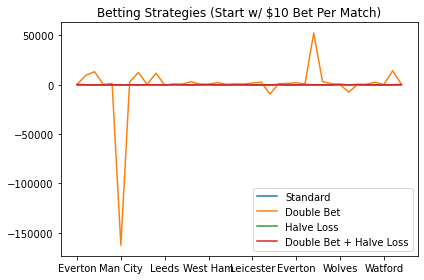

In [46]:
results_df['Bet Strategy 1'].plot()
results_df['Bet Strategy 2'].plot()
results_df['Bet Strategy 3'].plot()
results_df['Bet Strategy 4'].plot()
plt.legend(['Standard','Double Bet','Halve Loss','Double Bet + Halve Loss'])
plt.title('Betting Strategies (Start w/ $10 Bet Per Match)')
plt.tight_layout()

In [47]:
#results_df

# Neural Network

In [50]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np

In [51]:
#One hot encoder function
from sklearn.preprocessing import LabelEncoder
def one_hot_encoder(array):
    from sklearn.preprocessing import LabelEncoder
    encoder = LabelEncoder()
    encoder.fit(array)
    coded_array = encoder.transform(array)
    n = len(coded_array)
    n_labels = len(np.unique(coded_array))
    one_hot = np.zeros((n,n_labels))
    one_hot[np.arange(n), coded_array] = 1
    return one_hot

In [52]:
#Function to create confusion matrix
def nn_confusion(team, actuals, predictions):
    tp=tn=fp=fn=0
    for i in range(len(actuals)):
        a_class=p_class=0
        if int(actuals[i][0] == 0):
            a_class = 1 
        if int(predictions[i][0] == 0):
            p_class = 1
        if a_class == 1 and p_class == 1:
            tp +=1
        elif a_class == 1 and p_class == 0:
            fn +=1
        elif a_class == 0 and p_class == 0:
            tn +=1
        elif a_class == 0 and p_class == 1:
            fp +=1
  # True Positive Rate (Sensitivity)
    try:
        tpr = tp/(tp+fn)
    except ZeroDivisionError:
        tpr = None
  # True Negative Rate (specificity)
    try:    
        tnr = tn/(tn+fp)
    except ZeroDivisionError:
        tnr = None
  # False Positive Rate
    try:
        fpr = fp/(fp+tn)
    except ZeroDivisionError:
        fpr = None
  # Precision
    try:
        precision = tp/(tp+fp)
    except ZeroDivisionError:
        precision = None
  # Accuracy
    accuracy = (tp+tn)/(tp+tn+fp+fn)
  # Return dataframe with info
    #results = ["TPR:", tpr,"TNR: ", tnr, "FPR: ", fpr, "Precision: ", precision, "Accuracy: ",accuracy]
    results = pd.DataFrame({"TPR":tpr,
                          "TNR":tnr,
                          "FPR":fpr,
                          "Precision":precision,
                          "Accuracy":accuracy},
                        index = [team])
    return results

In [53]:
def betting_net_new(train_data, test_data, team, test_thresh, epochs, solver, learning_rate, activation, hidden_layer_sizes, bet):

    # Define model parameters and initialize model
    from sklearn.neural_network import MLPClassifier
    clf = MLPClassifier(solver=solver,
                    alpha=1e-5,
                    hidden_layer_sizes=hidden_layer_sizes,
                    max_iter = epochs,
                    random_state=1)
    
    #Variables
    leng = len(train_data.columns) #for indexing labels
    
    #Set up inputs and labels for training
    X_train = train_data[train_data.columns[0:leng-1]]
    y_train = train_data[train_data.columns[leng-1]]
    Y_train = one_hot_encoder(y_train)
    
    #Set up inputs and labels for training
    X_test = test_data[test_data.columns[0:leng-1]]
    y_test = test_data[test_data.columns[leng-1]]
    Y_test = one_hot_encoder(y_test)
    
    
    # fill NaN vlaues with 0
    X_train.fillna(0, inplace=True)
    X_test.fillna(0, inplace=True)
    np.nan_to_num(Y_train, nan=0.0)
    np.nan_to_num(Y_test, nan=0.0)
      
    # run NN model to get predictions
    clf.fit(X_train, Y_train)
    actuals = Y_test
    predictions = clf.predict(X_test)
    winnings = 0
    
    for i in range(len(predictions)):
        count = 0
        for j in [0,1]:
            if int(predictions[i][j]) == int(actuals[i][j]):
                count +=1
        if count == 2:
            winnings += bet
        else:
            winnings -= bet

    #results1 = pd.DataFrame({"Profit/Loss": winnings},
     #                      index = [team])
            
    base = bet # reset the bet back to original starting bet
    # double the bet every time you lose
    double = 0
    for i in range(len(predictions)):
        count = 0
        for j in [0,1]:
            if int(predictions[i][j]) == int(actuals[i][j]):
                count +=1
        if count == 2:
            double += base
        else:
            double -= base
            base =  base*2
    
    base = bet # reset the bet back to original starting bet
    # halve the bet every time you lose
    halved=0

    for i in range(len(predictions)):
        count = 0
        for j in [0,1]:
            if int(predictions[i][j]) == int(actuals[i][j]):
                count +=1
        if count == 2:
            halved += base
        else:
            halved -= base
            base =  base/2
  
    base = bet # reset the bet back to original starting bet
    # halve the bet every time you lose, double the bet every time you win
    halved_doubled = 0 
    for i in range(len(predictions)):
        if base > 100 or base < 1:
            base = bet
        count = 0
        for j in [0,1]:
            if int(predictions[i][j]) == int(actuals[i][j]):
                count +=1
        if count == 2:
            halved_doubled += base
            base = base*2
        else:
            halved_doubled -= base
            base = base/2
    
    base = bet # reset the bet back to original starting bet NO LIMIT
    # halve the bet every time you lose, double the bet every time you win
    halved_doubled2 = 0 
    for i in range(len(predictions)):
        count = 0
        for j in [0,1]:
            if int(predictions[i][j]) == int(actuals[i][j]):
                count +=1
        if count == 2:
            halved_doubled2 += base
            base = base*2
        else:
            halved_doubled2 -= base
            base = base/2
    
    results = pd.DataFrame({"Team":team,"Bet Strategy 1":winnings,
                            "Bet Strategy 2":double,
                            "Bet Strategy 3":halved,
                            "Bet Strategy 4.1":halved_doubled,
                            "Bet Strategy 4.2":halved_doubled2},
                            index = [team])
    
    return results, actuals, predictions

In [54]:
#Set names for modeling
roll_home_train = rolling5_ema_home_nn_train
roll_away_train = rolling5_ema_away_nn_train
roll_home_test = rolling5_ema_home_nn_test
roll_away_test = rolling5_ema_away_nn_test

In [56]:
# Exploring parameters/architectures
epochs = 1000
solver = pd.Series(["sgd",'lbfgs','adam'])
learning_rate = pd.Series(["constant", "invscaling", "adaptive"])
activation = pd.Series(["tanh","relu","sigmoid"])
hidden_layer_sizes=[(30,),(60,),(80,)][2]
test_thresh=0.1
bet = 10

results_final = pd.DataFrame(columns = ["TPR","TNR","FPR","Precision","Accuracy"])
archi_det = pd.DataFrame(columns=["Solver","Learning Rate","Activation", "Average Accuracy"])

for i in range(0,3):
    for j in range(0,3):
        for k in range(0,3):
            results_df = pd.DataFrame(columns = ["TPR","TNR","FPR","Precision","Accuracy"])
            for team in HomeTeamsNN:
                try:
                    train_data= roll_home_train[team]
                    test_data = roll_home_test[team]
                    winnings, actuals, predictions = betting_net_new(train_data,test_data, team, test_thresh, epochs, solver[i], learning_rate[j], activation[k], hidden_layer_sizes, bet)
                    r = nn_confusion(team, actuals, predictions)
                    results_df = pd.concat([results_df,r])                    
                except IndexError:
                    pass
            new = pd.DataFrame({"Solver": solver[i],
                                "Learning Rate": learning_rate[j],
                                "Activation": activation[k],
                                "Average Accuracy": results_df.Accuracy.mean()},
                              index=[team])
            archi_det = pd.concat([archi_det,new])
    

In [62]:
#Analyze architectures
architectures = archi_det.reset_index()
architectures = architectures.drop(['index'], axis=1)
architectures.sort_values(by= "Average Accuracy", ascending=False)
output_architectures = architectures.loc[[26, 1, 11]].reset_index().drop(['index'], axis=1)

In [58]:
#testing best parameters/architecture
epochs = 1000
solver = 'adam'
learning_rate = 'adaptive'
activation = 'sigmoid'
hidden_layer_sizes=[(30,),(60,),(80,)][2]
test_thresh=0.1
bet = 10
results_df = pd.DataFrame(columns = ["TPR","TNR","FPR","Precision","Accuracy"])
bet_results = pd.DataFrame(columns=["Solver","Learning Rate","Activation", "Profit/Loss"])
betting = pd.DataFrame(columns = ["Team","Bet Strategy 1", "Bet Strategy 2","Bet Strategy 3","Bet Strategy 4.1","Bet Strategy 4.2"])

for team in HomeTeamsNN:
    try:
        train_data = roll_home_train[team]
        test_data = roll_home_test[team]
        winnings, actuals, predictions = betting_net_new(train_data,test_data, team, test_thresh, epochs, solver, learning_rate, activation, hidden_layer_sizes, bet)
        r = nn_confusion(team, actuals, predictions)
        results_df = pd.concat([results_df,r])
        betting = pd.concat([betting,winnings])

    except IndexError:
        pass  

In [63]:
#Clean results
both = betting.join(results_df.Accuracy)
total = pd.DataFrame({"Team": "TOTAL", 
                      "Bet Strategy 1":both["Bet Strategy 1"].sum(),
                      "Bet Strategy 2":both["Bet Strategy 2"].sum(),
                      "Bet Strategy 3":both["Bet Strategy 3"].sum(),
                      "Bet Strategy 4.1":both["Bet Strategy 4.1"].sum(),
                      "Bet Strategy 4.2":both["Bet Strategy 4.2"].sum(),
                      "Accuracy":both["Accuracy"].mean()},
                     index = ["TOTAL"])
bothnew = pd.concat([both,total])
bothnew=bothnew.drop(["Team"],axis=1)

In [294]:
bothnew

,Bet Strategy 1,Bet Strategy 2,Bet Strategy 3,Bet Strategy 4,Accuracy
Man United,50,1390,8.125,60.0,0.647059
Burnley,70,-50,53.125,250.0,0.705882
Chelsea,20,790,12.34375,-140.0,0.5625
Everton,80,300,39.375,235.0,0.75
Leicester,40,420,6.5625,105.0,0.75
Watford,120,450,30.0,405.0,0.875
Norwich,110,300,63.75,315.0,0.823529
Newcastle,130,300,82.5,410.0,0.882353
Tottenham,60,540,24.375,50.0,0.75
Liverpool,150,280,85.0,480.0,0.941176


# Approach II (one big set)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import datetime
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
df_raw = pd.read_csv('pl20_21.csv')

In [ ]:
# Function that converts results into int, needed for the predictions and the rolling average
def f(x):
  if x=='H':
    return float(1)
  if x=='A':
    return float((-1))
  if x=='D':
    
    return float(0)


In [ ]:
# Same as above, but for the binary predictions, only two possible outcomes, 1 or 0
def f_binary(x):
  if x=='H':
    return float(1)
  else:
    return float((0))
  if x=='D':
    return float(0)

In [ ]:
def df_raw_creation(year_min,year_max=2021):

    # Definition of the time frame
    strt_date=year_min-2000
    end_date=year_max-2000
    # File with the data
    file_path="pl"
    df_raw=pd.DataFrame()

    # WHile we are still processing the data
    while strt_date < end_date:
      # if start date<9, have to add a 0 before the 9 to get "09" and not 9, as it is in the file
      if strt_date < 9:
        file_name = file_path+'0'+str(strt_date)+"_"+'0'+str(strt_date+1)+".csv"
      if strt_date == 9:
        file_name = file_path+'0'+str(strt_date)+"_"+str(strt_date+1)+".csv"
      else:
        file_name = file_path+str(strt_date)+"_"+str(strt_date+1)+".csv"
      # If no dataframe yet, create one, else, add the new data to existing dataframe
      if len(df_raw)==0:
        #Create dataframe from the file
        df_raw=pd.read_csv(file_name)
      else:
        # Add datafame to existing dataframe
        dff = pd.read_csv(file_name)
        df_raw=df_raw.append(dff)
      strt_date = strt_date+1
    return (df_raw)



In [ ]:
# Creation of the rolling average columns and of the dataframes needed for the models

def dataframe_construction(year_min, year_max):


    df_raw=df_raw_creation(year_min, year_max)

    # Only keep average odds
    df_raw['Home_Odd']=df_raw['IWH']
    df_raw['Away_Odd']=df_raw['IWA']
    df_raw['Draw_Odd']=df_raw['IWD']
    df_raw['Date']=pd.to_datetime(df_raw['Date'])

    # Must decide if using f or f_binary, as explained above
    df_raw['Result'] = df_raw['FTR'].apply(lambda x: f(x))

    # Creation of an empty dataframes, with the columns we want, that we will fill in during this function 
    df_final=pd.DataFrame(columns=['HomeTeam', 'AwayTeam', 'Date', 'Home_Odd', 'Away_Odd', 'Draw_Odd','Result', 'WR_H_H', 'WR_H', 'WR_A_A', 'WR_A', 'Avg_G_H', 'Avg_G_H_T', 'Avg_G_A',
          'Avg_G_A_T'])


    # Contsruction of the dataframe for the whole season

    for date_of_the_game in df_raw['Date'].unique():
      # Keep only the games that happened before the date of the game
      df_analysis=df_raw[df_raw['Date']<date_of_the_game]

      # Average goals scored by the team before this game and for the away team
      df_home_goals=df_analysis.groupby('HomeTeam').mean('FTHG')[['FTHG']].reset_index()
      df_away_goals=df_analysis.groupby('AwayTeam').mean('FTAG')[['FTAG']].reset_index()

     # Creation of the dataframe, with the average number of goals scored by the team
      df_goals=pd.merge(df_home_goals, df_away_goals, left_on='HomeTeam', right_on='AwayTeam').rename(columns={'AwayTeam':'Team'})
      df_goals=df_goals[['Team', 'FTHG', 'FTAG']]
      df_goals['Avg_Goals']=(df_goals['FTHG']+df_goals['FTAG'])/2
      df_goals.columns=['Team', 'Average_goals_w_home', 'Average_goals_w_away', 'Avg_goals']

      # Same thing but with the results
      df_home_results=df_analysis.groupby('HomeTeam').mean('Result')[['Result']].reset_index().rename(columns={'Result':'Results_when_home'})
      df_away_results=df_analysis.groupby('AwayTeam').mean('Result')[['Result']].reset_index().rename(columns={'Result':'Results_when_away'})
      df_results=pd.merge(df_home_results, df_away_results, left_on='HomeTeam', right_on='AwayTeam').drop('AwayTeam', axis=1).rename(columns={'HomeTeam':'Team'})
      df_results['Average result']=(df_results['Results_when_home']+df_results['Results_when_away'])/2  

      # Average goals conceded by the team before this game and for the away team
      df_home_goals_conceded=df_analysis.groupby('HomeTeam').mean('FTAG')[['FTAG']].reset_index()
      df_away_goals_conceded=df_analysis.groupby('AwayTeam').mean('FTHG')[['FTHG']].reset_index()
       # Creation of the dataframe, with the average number of goals conceded by the team
      df_goals_conceded=pd.merge(df_home_goals_conceded, df_away_goals_conceded, left_on='HomeTeam', right_on='AwayTeam').rename(columns={'AwayTeam':'Team'})
      df_goals_conceded=df_goals_conceded[['Team', 'FTHG', 'FTAG']]
      df_goals_conceded['Avg_Goals']=(df_goals_conceded['FTHG']+df_goals_conceded['FTAG'])/2
      df_goals_conceded.columns=['Team', 'Average_goals_conceded_w_home', 'Average_goals_conceded_w_away', 'Avg_goals_conceded']

      

      # Only keep the relevant columns from df_analysis
      df=df_raw[['HomeTeam', 'AwayTeam', 'Date', 'Home_Odd', 'Draw_Odd', 'Away_Odd', 'Result']]
      df=df[df['Date']==date_of_the_game]

      # do the merge 
      df=pd.merge(df, df_results[['Team', "Results_when_home", 'Average result']], left_on='HomeTeam', right_on='Team').drop('Team', axis=1).rename(columns={'Results_when_home':"WR_H_H", 'Average result':'WR_H'})
      df=pd.merge(df, df_results[['Team', "Results_when_away", 'Average result']], left_on='AwayTeam', right_on='Team').drop('Team', axis=1).rename(columns={'Results_when_away':"WR_A_A", 'Average result':'WR_A'})
      df=pd.merge(df, df_goals[['Team', "Average_goals_w_home", 'Avg_goals']], left_on='HomeTeam', right_on='Team').drop('Team', axis=1).rename(columns={'Average_goals_w_home':"Avg_G_H", 'Avg_goals':'Avg_G_H_T'})
      df=pd.merge(df, df_goals[['Team', "Average_goals_w_away", 'Avg_goals']], left_on='AwayTeam', right_on='Team').drop('Team', axis=1).rename(columns={'Average_goals_w_away':"Avg_G_A", 'Avg_goals':'Avg_G_A_T'})
      df=pd.merge(df, df_goals_conceded[['Team', "Average_goals_conceded_w_home", 'Avg_goals_conceded']], left_on='HomeTeam', right_on='Team').drop('Team', axis=1).rename(columns={'Average_goals_conceded_w_home':"Avg_G_C_H", 'Avg_goals_conceded':'Avg_G_C_H_T'})
      df=pd.merge(df, df_goals_conceded[['Team', "Average_goals_conceded_w_away", 'Avg_goals_conceded']], left_on='AwayTeam', right_on='Team').drop('Team', axis=1).rename(columns={'Average_goals_conceded_w_away':"Avg_G_C_A", 'Avg_goals_conceded':'Avg_G_C_A_T'})


      df_final=df_final.append(df)

    return (df_final)


In [ ]:
# Creation of the train and test dataframe
data_train=dataframe_construction(2015,2020)
data_test=dataframe_construction(2020,2021)

In [ ]:
# Get dummies to convert text columns into int
data_train=pd.get_dummies(data=data_train, columns=['HomeTeam', 'AwayTeam'], drop_first=True)
data_test=pd.get_dummies(data=data_test, columns=['HomeTeam', 'AwayTeam'], drop_first=True)
# Drop non relevant columns
data_train.drop('Date', axis=1, inplace=True)
data_test.drop('Date', axis=1, inplace=True)


In [ ]:
# Make sur columns are the same in df_train and df_test, especially for teams that would have been relegated, and therefore not in the df_test dummies column
for column in data_train.columns:
  if column not in data_test.columns:
    data_train.drop(column, axis=1, inplace=True)

for column in data_test.columns:
  if column not in data_train.columns:
    data_test.drop(column, axis=1, inplace=True)

In [ ]:
x_train=data_train.drop('Result', axis=1).values
y_train=data_train[['Result']].values

x_test=data_test.drop('Result', axis=1).values
y_test=data_test[['Result']].values

# Binary approach, knn model

Need to make sure that the dataframe creation has been made with f_binary to get only 2 possible outcomes of the games

In [ ]:
#knn


model = KNeighborsClassifier(n_neighbors=28,p=2)

# Train the model using the training sets
model.fit(x_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=28)

In [ ]:
# Predictions
y_pred=model.predict(x_test)

In [ ]:
accuracy_score(y_pred,y_test)

0.6752136752136753

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[169  54]
 [ 60  68]]


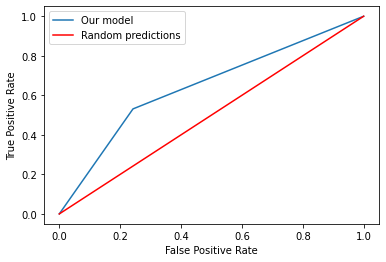

In [ ]:

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr, label='Our model')
plt.plot([0,1],[0,1], color='red',label='Random predictions')
plt.legend()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# f1 score
metrics.f1_score(y_test, y_pred)

0.544

(array([229.,   0.,   0.,   0., 122.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 5 Patch objects>)

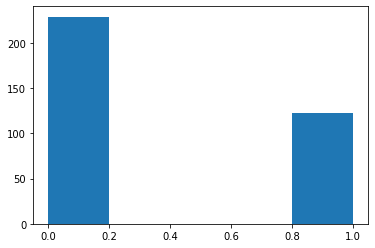

In [ ]:
# Visulalisation of the prediction
plt.hist(y_pred,bins=5)

# Second approach, more granular

Need to make sure that the dataframe creation has been made with f and not f_binary,to get the 3 possible outcomes of the games

In [ ]:
# Random Forest

#Random Forest
RF = RandomForestClassifier(n_estimators=100)
RF.fit(x_train ,y_train)
# predictions
y_pred_rf= RF.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [ ]:
# Betting strategy creation

def betting_strategy(bet, df, y_pred):
  #Creation of columns with the betting strategy
   #Add a column with the predictions
  df['Predictions']=y_pred
  # Creation of a column, with 1 if model predicted the good result, 0 otherwise
  df['Good prediction']=np.where(df['Predictions']==df['Result'],1,0)
  profit=0

  #Profit computation
  for i in range (len(df)):

    #If prediction is wrong, you loose your bet
    if df.iloc[i]['Good prediction']==0:
      profit -= bet
    
    # If prediction is OK, you win the odds you've bet on, home_odd, draw_odd or away_odd
    else:
      if df.iloc[i]['Predictions']==1:
        profit+=bet*(df.iloc[i]['Home_Odd'])
      if df.iloc[i]['Predictions']==0:
        profit+=bet*(df.iloc[i]['Draw_Odd'])
      if df.iloc[i]['Predictions']==-1:
        profit+=bet*(df.iloc[i]['Away_Odd'])
  return profit

In [ ]:
# Betting stategy implementation, using the previous function
betting_strategy(10,data_test,y_pred_rf)

1738.7

In [ ]:
accuracy_score(y_pred_rf, y_test)

0.5014245014245015

In [ ]:
confusion_matrix(y_pred_rf, y_test)

array([[71, 30, 22],
       [13, 12, 13],
       [59, 38, 93]])

# Neural Net

In [53]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np

In [54]:
from sklearn.preprocessing import LabelEncoder
def one_hot_encoder(array):
    from sklearn.preprocessing import LabelEncoder
    encoder = LabelEncoder()
    encoder.fit(array)
    coded_array = encoder.transform(array)
    n = len(coded_array)
    n_labels = len(np.unique(coded_array))
    one_hot = np.zeros((n,n_labels))
    one_hot[np.arange(n), coded_array] = 1
    return one_hot

In [55]:
def df_creation_nn(data_train, data_test, epochs, solver, learning_rate, activation, hidden_layer_sizes):
    # Define model parameters and initialize model
    from sklearn.neural_network import MLPClassifier
    clf = MLPClassifier(solver=solver,
                    alpha=1e-5,
                    hidden_layer_sizes=hidden_layer_sizes,
                    max_iter = epochs,
                    random_state=1)
    
    leng = len(data_train.columns)
    
    #set up data for train
    X_train = data_train[data_train.columns[0:leng-1]]
    y_train = data_train[data_train.columns[leng-1]]
    Y_train = one_hot_encoder(y_train)
    
    #set up data for train
    X_test = data_test[data_test.columns[0:leng-1]]
    y_test = data_test[data_test.columns[leng-1]]
    Y_test = one_hot_encoder(y_test)
    
    # run NN model to get predictions
    clf.fit(X_train, Y_train)
    actuals = Y_test
    predictions = clf.predict(X_test)
    
    return actuals, predictions

In [56]:
def nn_confusion(actuals, predictions):
    tp=tn=fp=fn=0
    for i in range(len(actuals)):
        a_class=p_class=0
        if int(actuals[i][0] == 0):
            a_class = 1 
        if int(predictions[i][0] == 0):
            p_class = 1
        if a_class == 1 and p_class == 1:
            tp +=1
        elif a_class == 1 and p_class == 0:
            fn +=1
        elif a_class == 0 and p_class == 0:
            tn +=1
        elif a_class == 0 and p_class == 1:
            fp +=1
  # True Positive Rate (Sensitivity)
    try:
        tpr = tp/(tp+fn)
    except ZeroDivisionError:
        tpr = None
  # True Negative Rate (specificity)
    try:    
        tnr = tn/(tn+fp)
    except ZeroDivisionError:
        tnr = None
  # False Positive Rate
    try:
        fpr = fp/(fp+tn)
    except ZeroDivisionError:
        fpr = None
  # Precision
    try:
        precision = tp/(tp+fp)
    except ZeroDivisionError:
        precision = None
  # Accuracy
    accuracy = (tp+tn)/(tp+tn+fp+fn)
  # Return dataframe with info
    results = ["TPR:", tpr,"TNR: ", tnr, "FPR: ", fpr, "Precision: ", precision, "Accuracy: ",accuracy]
    
    return results

In [57]:
def format_name(data):
    new_col = data["AwayTeam"] +" at "+ data["HomeTeam"]
    new_col = pd.DataFrame(new_col)
    data["Team"] = new_col
    data.set_index("Team", inplace=True)
    data = data.drop("HomeTeam", axis=1)
    data = data.drop("AwayTeam", axis=1)
    data = data.drop("Date", axis=1)
    
    return data

In [58]:
#SET UP DATA FOR TRAIN/TEST
df1= dataframe_construction(2015,2020)
df2= dataframe_construction(2020,2021)

# Redo result column
df1["FTR"] = np.where(df1.Result == 1, "H", "A")
df1 = df1.drop("Result", axis=1)

df2["FTR"] = np.where(df2.Result == 1, "H", "A")
df2 = df2.drop("Result", axis=1)

/var/folders/4h/hhj47rrd5sd9pxb64ky2_x780000gn/T/ipykernel_48518/1599893131.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_raw=df_raw.append(dff)
/var/folders/4h/hhj47rrd5sd9pxb64ky2_x780000gn/T/ipykernel_48518/1599893131.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_raw=df_raw.append(dff)
/var/folders/4h/hhj47rrd5sd9pxb64ky2_x780000gn/T/ipykernel_48518/1599893131.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_raw=df_raw.append(dff)
/var/folders/4h/hhj47rrd5sd9pxb64ky2_x780000gn/T/ipykernel_48518/1599893131.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_raw=df_raw.append(dff)
/opt/anaconda3/lib/pytho

In [59]:
data_train = df1
data_test = df2

data_train = format_name(data_train)
data_test = format_name(data_test)

In [60]:
epochs = 100
solver = ["sgd",'lbfgs','adam']
learning_rate = ["constant", "invscaling", "adaptive"]
activation = ['logistic','tanh','relu']
hidden_layer_sizes=[(30,),(60,),(80,)][1]

In [61]:
#actuals, predictions = df_creation_nn(data_train, data_test, epochs, solver, learning_rate, activation, hidden_layer_sizes)

In [138]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'learning_rate':["constant", "invscaling", "adaptive"],
    'solver': ('sgd','lbfgs','adam'),
    'activation': ('logistic','tanh','relu'),
    'hidden_layer_sizes': ((30,),(60,),(80,)),
    'max_iter': (50,100,200,350,500)
    }

leng = len(data_train.columns)
X_train = data_train[data_train.columns[0:leng-1]]
y_train = data_train[data_train.columns[leng-1]]
Y_train = one_hot_encoder(y_train)

In [62]:
#USING BEST PARAMETERS FROM GRID SEARCH
epochs = 500
solver = 'adam'
learning_rate = "constant"
activation = "logistic"
hidden_layer_sizes = (30,)


actuals, predictions = df_creation_nn(data_train, data_test, epochs, solver, learning_rate, activation, hidden_layer_sizes)
results = nn_confusion(actuals, predictions)

In [63]:
bet=10
winnings=0
for i in range(0,len(actuals)):
    if actuals[i][0]==predictions[i][0]:
        winnings+=10
    else:
        winnings-=10

In [64]:
print("Winnings: ", winnings)

Winnings:  1250


In [85]:
x = pd.DataFrame({"Epochs": epochs, "Solver": solver, "Learning Rate" : learning_rate, "Activation": activation, 
 "Hidden Layer Size" : "(30,)", "Profit": "$"+str(winnings)}, index=[solver])

y = pd.DataFrame({results[0]:results[1],results[2]:results[3], results[4]:results[5], results[6]: results[7],
                  results[8]:results[9]}, index = [results[0]]
                )
print(x)
print(y)

      Epochs Solver Learning Rate Activation Hidden Layer Size Profit
adam     500   adam      constant   logistic             (30,)  $1250
          TPR:     TNR:      FPR:   Precision:   Accuracy: 
TPR:  0.507812  0.775785  0.224215     0.565217    0.678063


In [83]:
y

,TPR:,TNR:,FPR:,Precision:,Accuracy:
TPR:,0.507812,0.775785,0.224215,0.565217,0.678063


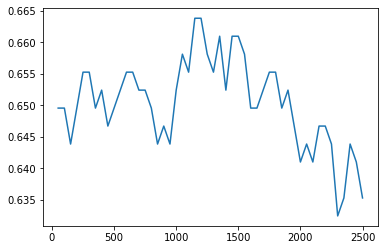

In [150]:
plt.plot(epochs,tracker_adam)
#plt.plot(epochs,tracker_sgd)